In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import cluster      
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets     
from sklearn import manifold    
from scipy import stats as st
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import TSNE
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MeanShift, estimate_bandwidth
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import scipy.cluster.hierarchy as sch
import fiona

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Preprocesado y modelado Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

%matplotlib inline

In [2]:
data = pd.read_csv("2017_no_super22.csv", encoding = "ISO-8859-1", sep=';')


In [3]:
#datos
display(data.head())




,Nombre_Barrio,RATIO_AIRBNB_HECTAREA,PRECIO_M2,SUPERFCIE_M2,RATIO_PUERTA,RATIO_LOCAL_HECTAREA,TAM_HOGAR_MEDIO,RATIO_HOGARES_1PER,HIPOT_MEDIA,DENSIDAD_HAB,...,IND_ESTRUCTURA_POBLA_ACTIVA,IND_REEMPLAZO_POBLA_ACTIVA,RZ_PROGRESIVIDAD_DEMO,PROPOR_EXTRANJEROS,PROPOR_NACIDOS_FUERA_ESPAÑA,PROPOR_INMIG_EXTRANJ,TOTAL_COMPRAVENTA,SIN_ESTUDIOS,ESTUDIOS_SECUNDARIOS,ESTUDIOS_UNIVERSITARIOS
0,ZOFÍO,0.10,1624,61.58,0.934,8.45,2.73,0.256,88859.65,173.72,...,82.64,86.19,107.14,20.61,31.88,16.19,59,0.296,0.578,0.126
1,VISTA ALEGRE,0.45,1837,65.26,0.905,20.20,2.61,0.282,91000.54,278.88,...,82.67,59.65,95.76,19.01,30.49,15.02,451,0.259,0.569,0.172
2,VINATEROS,0.27,2269,73.20,0.821,6.38,2.33,0.321,111452.75,282.28,...,72.71,67.75,89.45,9.85,17.78,6.20,158,0.247,0.525,0.228
3,VENTAS,0.25,2277,67.92,0.919,8.61,2.39,0.330,120439.34,147.92,...,78.89,62.83,98.43,14.40,26.28,10.57,535,0.227,0.553,0.219
4,VALVERDE,0.05,3191,84.83,0.787,3.15,2.72,0.256,197584.70,66.82,...,81.09,85.94,99.59,9.94,16.26,6.73,773,0.136,0.418,0.446


In [4]:
#valores
display(data.describe().transpose())


,count,mean,std,min,25%,50%,75%,max
RATIO_AIRBNB_HECTAREA,130.0,1.127769,2.951926,0.010,0.04000,0.2050,0.76500,19.940
PRECIO_M2,130.0,3055.884615,1228.736104,1043.000,1950.00000,2956.5000,3746.50000,7054.000
SUPERFCIE_M2,130.0,88.220231,26.490347,53.030,68.97500,80.7700,96.37500,182.480
RATIO_PUERTA,130.0,0.759908,0.158450,0.210,0.66400,0.7865,0.88275,1.000
RATIO_LOCAL_HECTAREA,130.0,11.201231,10.907864,0.010,2.92750,8.1050,17.11250,55.330
TAM_HOGAR_MEDIO,130.0,2.551231,0.270592,1.950,2.38250,2.5500,2.71000,3.480
RATIO_HOGARES_1PER,130.0,0.303415,0.072490,0.166,0.25600,0.2995,0.34875,0.499
HIPOT_MEDIA,130.0,196781.121000,123770.208424,58487.580,110893.49750,164866.6850,240415.16750,701246.370
DENSIDAD_HAB,130.0,180.961308,118.230124,0.180,82.02500,173.4400,257.28750,443.510
EDAD_PROMEDIO,130.0,43.861385,3.613296,32.580,42.61750,44.9500,46.29000,49.330


In [5]:
#dimensiones
list(data)
#tipo de datos
data.dtypes

Nombre_Barrio                    object
RATIO_AIRBNB_HECTAREA           float64
PRECIO_M2                         int64
SUPERFCIE_M2                    float64
RATIO_PUERTA                    float64
RATIO_LOCAL_HECTAREA            float64
TAM_HOGAR_MEDIO                 float64
RATIO_HOGARES_1PER              float64
HIPOT_MEDIA                     float64
DENSIDAD_HAB                    float64
EDAD_PROMEDIO                   float64
EDAD_MEDIANA                    float64
PROPOR_DE_JUVENTUD              float64
PROPOR_ENVEJECIMIENTO           float64
PROPOR_DESOBREENVEJECIMIENTO    float64
IND_ENVEJECIMIENTO              float64
IND_JUVENTUD                    float64
IND_DEPENDENCIA                 float64
IND_ESTRUCTURA_POBLA_ACTIVA     float64
IND_REEMPLAZO_POBLA_ACTIVA      float64
RZ_PROGRESIVIDAD_DEMO           float64
PROPOR_EXTRANJEROS              float64
PROPOR_NACIDOS_FUERA_ESPAÑA     float64
PROPOR_INMIG_EXTRANJ            float64
TOTAL_COMPRAVENTA                 int64


In [6]:
#Valores nulos
print(data.isnull().sum())
print(data.isna().sum())

Nombre_Barrio                   0
RATIO_AIRBNB_HECTAREA           0
PRECIO_M2                       0
SUPERFCIE_M2                    0
RATIO_PUERTA                    0
RATIO_LOCAL_HECTAREA            0
TAM_HOGAR_MEDIO                 0
RATIO_HOGARES_1PER              0
HIPOT_MEDIA                     0
DENSIDAD_HAB                    0
EDAD_PROMEDIO                   0
EDAD_MEDIANA                    0
PROPOR_DE_JUVENTUD              0
PROPOR_ENVEJECIMIENTO           0
PROPOR_DESOBREENVEJECIMIENTO    0
IND_ENVEJECIMIENTO              0
IND_JUVENTUD                    0
IND_DEPENDENCIA                 0
IND_ESTRUCTURA_POBLA_ACTIVA     0
IND_REEMPLAZO_POBLA_ACTIVA      0
RZ_PROGRESIVIDAD_DEMO           0
PROPOR_EXTRANJEROS              0
PROPOR_NACIDOS_FUERA_ESPAÑA     0
PROPOR_INMIG_EXTRANJ            0
TOTAL_COMPRAVENTA               0
SIN_ESTUDIOS                    0
ESTUDIOS_SECUNDARIOS            0
ESTUDIOS_UNIVERSITARIOS         0
dtype: int64
Nombre_Barrio                   0
R

['RATIO_AIRBNB_HECTAREA', 'PRECIO_M2', 'SUPERFCIE_M2', 'RATIO_PUERTA', 'RATIO_LOCAL_HECTAREA', 'TAM_HOGAR_MEDIO', 'RATIO_HOGARES_1PER', 'HIPOT_MEDIA', 'DENSIDAD_HAB', 'EDAD_PROMEDIO', 'EDAD_MEDIANA', 'PROPOR_DE_JUVENTUD', 'PROPOR_ENVEJECIMIENTO', 'PROPOR_DESOBREENVEJECIMIENTO', 'IND_ENVEJECIMIENTO', 'IND_JUVENTUD', 'IND_DEPENDENCIA', 'IND_ESTRUCTURA_POBLA_ACTIVA', 'IND_REEMPLAZO_POBLA_ACTIVA', 'RZ_PROGRESIVIDAD_DEMO', 'PROPOR_EXTRANJEROS', 'PROPOR_NACIDOS_FUERA_ESPAÑA', 'PROPOR_INMIG_EXTRANJ', 'TOTAL_COMPRAVENTA', 'SIN_ESTUDIOS', 'ESTUDIOS_SECUNDARIOS', 'ESTUDIOS_UNIVERSITARIOS']


array([[<AxesSubplot:title={'center':'RATIO_AIRBNB_HECTAREA'}>,
        <AxesSubplot:title={'center':'PRECIO_M2'}>,
        <AxesSubplot:title={'center':'SUPERFCIE_M2'}>,
        <AxesSubplot:title={'center':'RATIO_PUERTA'}>,
        <AxesSubplot:title={'center':'RATIO_LOCAL_HECTAREA'}>],
       [<AxesSubplot:title={'center':'TAM_HOGAR_MEDIO'}>,
        <AxesSubplot:title={'center':'RATIO_HOGARES_1PER'}>,
        <AxesSubplot:title={'center':'HIPOT_MEDIA'}>,
        <AxesSubplot:title={'center':'DENSIDAD_HAB'}>,
        <AxesSubplot:title={'center':'EDAD_PROMEDIO'}>],
       [<AxesSubplot:title={'center':'EDAD_MEDIANA'}>,
        <AxesSubplot:title={'center':'PROPOR_DE_JUVENTUD'}>,
        <AxesSubplot:title={'center':'PROPOR_ENVEJECIMIENTO'}>,
        <AxesSubplot:title={'center':'PROPOR_DESOBREENVEJECIMIENTO'}>,
        <AxesSubplot:title={'center':'IND_ENVEJECIMIENTO'}>],
       [<AxesSubplot:title={'center':'IND_JUVENTUD'}>,
        <AxesSubplot:title={'center':'IND_DEPENDENCIA'}>,

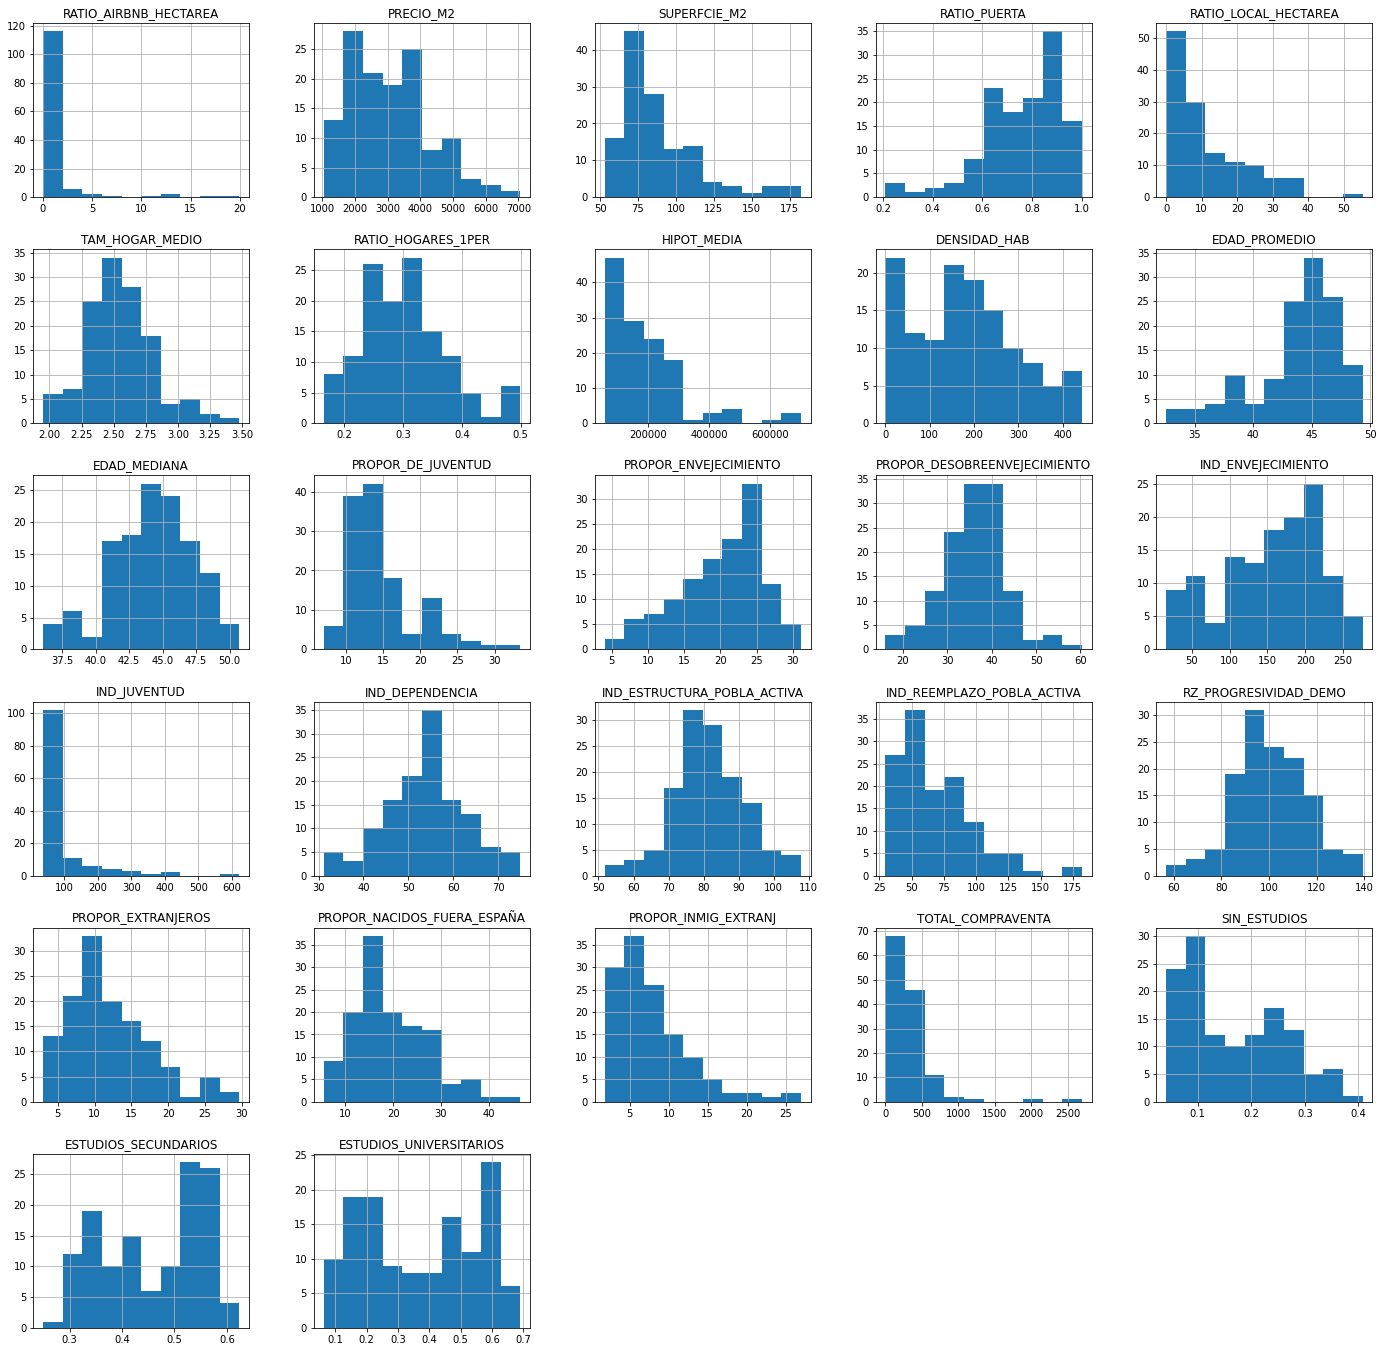

In [7]:
# histograma de dimensiones numericas:
dim=list(data)
dim_numericos=list(data)
dim_numericos.remove('Nombre_Barrio')
print(dim_numericos)

data.drop(['Nombre_Barrio'], axis=1).hist(figsize=(24, 24))

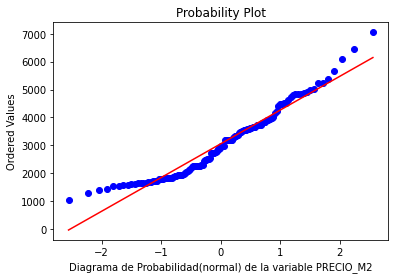

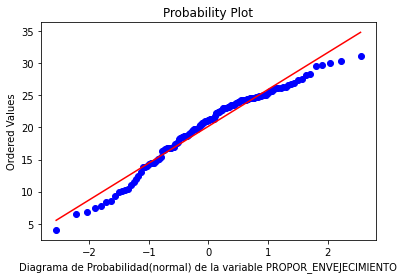

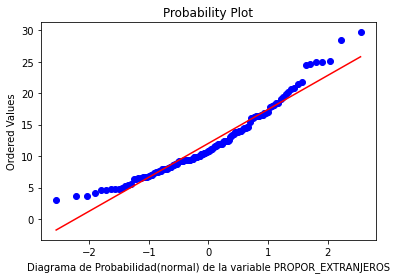

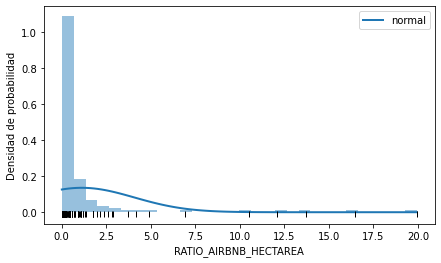

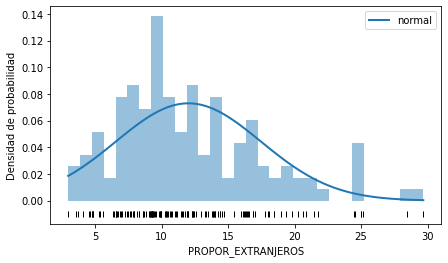

In [8]:
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(data[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()
    
normalidad_variable_numerica("PRECIO_M2")
normalidad_variable_numerica("PROPOR_ENVEJECIMIENTO")
normalidad_variable_numerica("PROPOR_EXTRANJEROS")


columnas_numericas = (['RATIO_AIRBNB_HECTAREA','PROPOR_EXTRANJEROS'])
for num_col in columnas_numericas:
    mu, sigma = stats.norm.fit(data[num_col])
    x_hat = np.linspace(min(data[num_col]), max(data[num_col]), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)
    fig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x_hat, y_hat, linewidth=2, label='normal')
    ax.hist(x=data[num_col], density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(data[num_col], np.full_like(data[num_col], -0.01), '|k', markeredgewidth=1)
    ax.set_xlabel(num_col)
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();


In [10]:
#Media y desviacion tipica de los valores numericos
#media y desviación
for featName in dim_numericos:
    print("***",featName,"***")
    mean = data[featName].mean()
    std = data[featName].std()
    print("mean '%s' : %.3f +- %.3f" % (featName, mean, std))

    

*** RATIO_AIRBNB_HECTAREA ***
mean 'RATIO_AIRBNB_HECTAREA' : 1.128 +- 2.952
*** PRECIO_M2 ***
mean 'PRECIO_M2' : 3055.885 +- 1228.736
*** SUPERFCIE_M2 ***
mean 'SUPERFCIE_M2' : 88.220 +- 26.490
*** RATIO_PUERTA ***
mean 'RATIO_PUERTA' : 0.760 +- 0.158
*** RATIO_LOCAL_HECTAREA ***
mean 'RATIO_LOCAL_HECTAREA' : 11.201 +- 10.908
*** TAM_HOGAR_MEDIO ***
mean 'TAM_HOGAR_MEDIO' : 2.551 +- 0.271
*** RATIO_HOGARES_1PER ***
mean 'RATIO_HOGARES_1PER' : 0.303 +- 0.072
*** HIPOT_MEDIA ***
mean 'HIPOT_MEDIA' : 196781.121 +- 123770.208
*** DENSIDAD_HAB ***
mean 'DENSIDAD_HAB' : 180.961 +- 118.230
*** EDAD_PROMEDIO ***
mean 'EDAD_PROMEDIO' : 43.861 +- 3.613
*** EDAD_MEDIANA ***
mean 'EDAD_MEDIANA' : 44.229 +- 3.054
*** PROPOR_DE_JUVENTUD ***
mean 'PROPOR_DE_JUVENTUD' : 14.681 +- 4.597
*** PROPOR_ENVEJECIMIENTO ***
mean 'PROPOR_ENVEJECIMIENTO' : 20.174 +- 5.754
*** PROPOR_DESOBREENVEJECIMIENTO ***
mean 'PROPOR_DESOBREENVEJECIMIENTO' : 36.200 +- 7.018
*** IND_ENVEJECIMIENTO ***
mean 'IND_ENVEJECIMIENTO

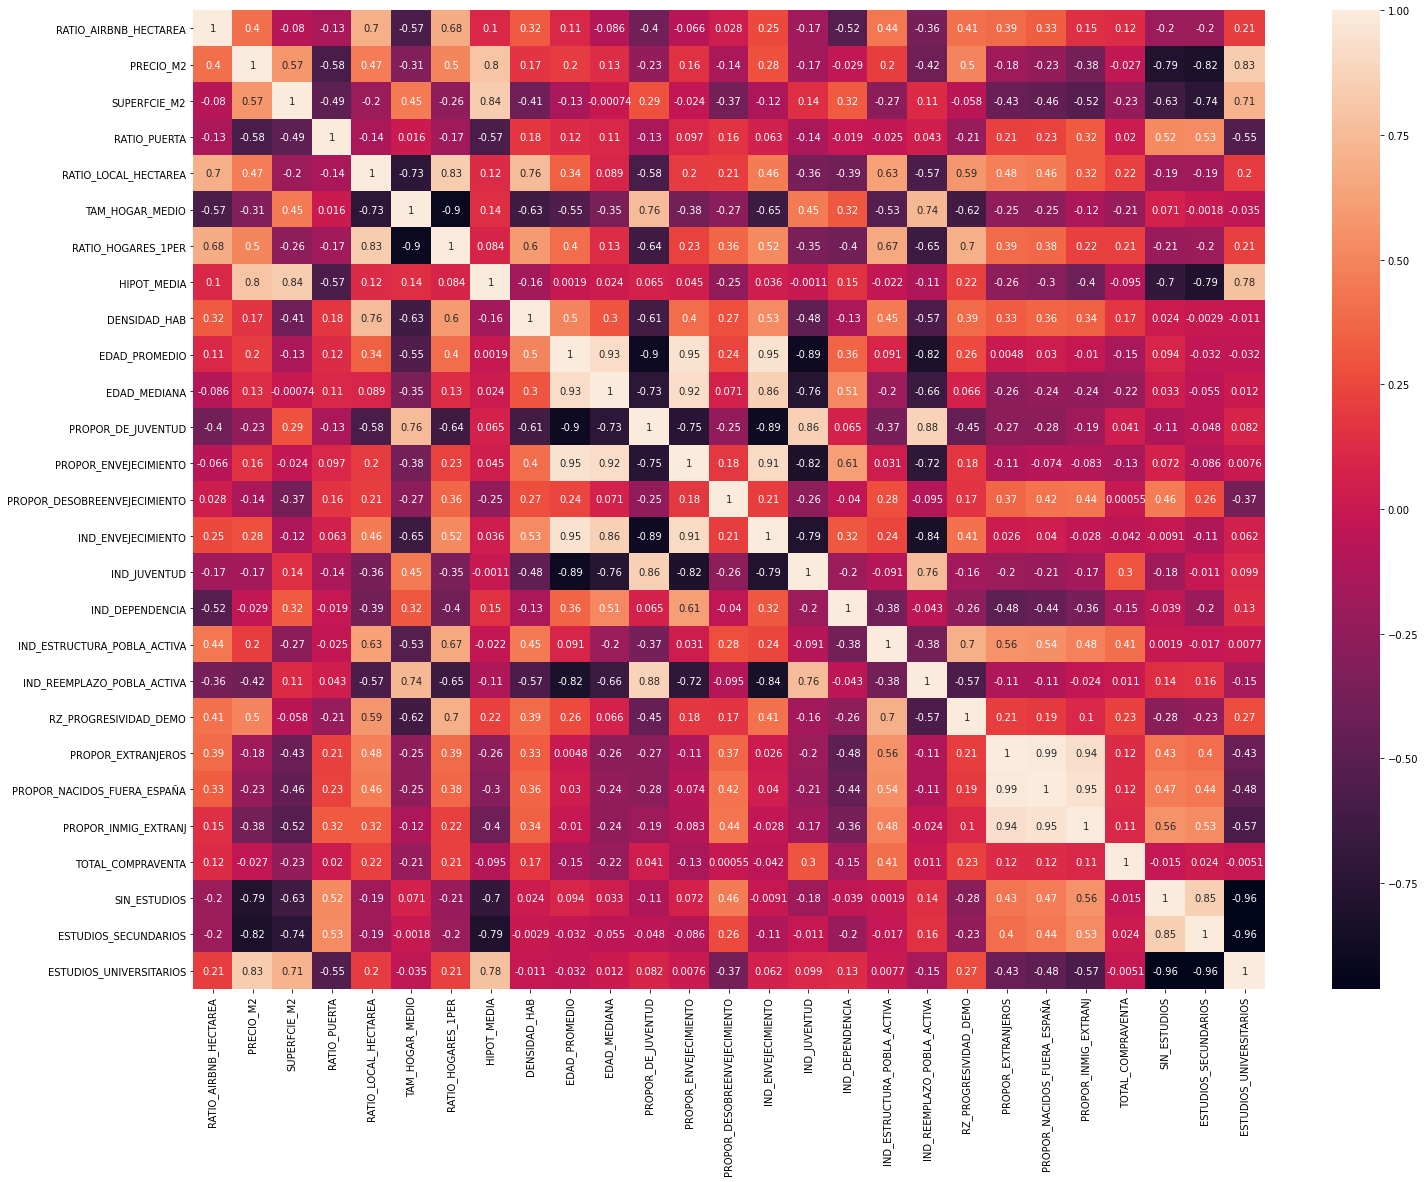

In [11]:
#Correlaciones
numeric_data=data.drop(columns=['Nombre_Barrio'])
corr_all = numeric_data.corr()
corr_all.style.background_gradient(cmap='coolwarm').set_precision(2)

plt.figure(figsize=(24, 18))
sns.heatmap(corr_all, annot=True)
plt.show()



<AxesSubplot:xlabel='EDAD_PROMEDIO', ylabel='IND_REEMPLAZO_POBLA_ACTIVA'>

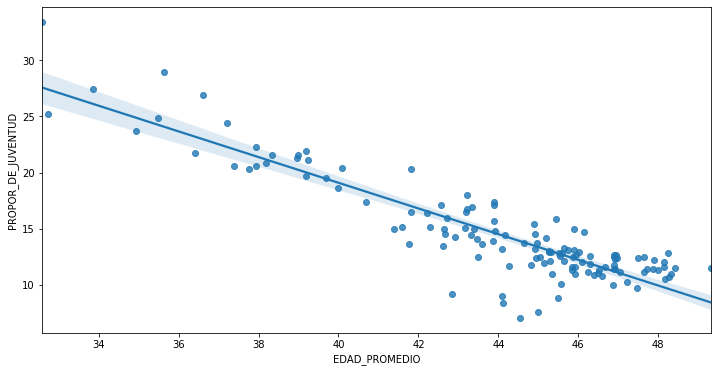

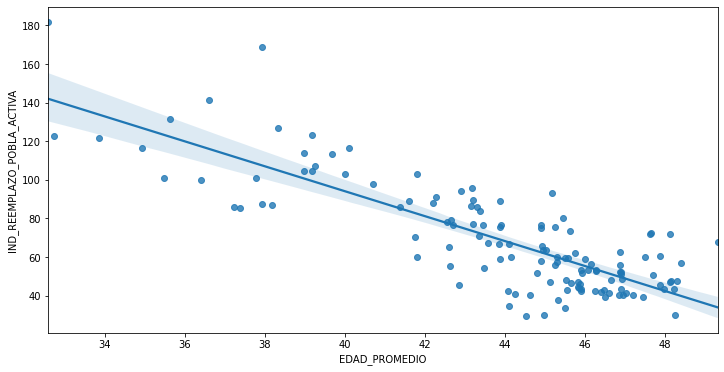

In [12]:
plt.figure(figsize=(12, 6))
sns.regplot(x="EDAD_PROMEDIO", y="PROPOR_DE_JUVENTUD", data=numeric_data)
plt.figure(figsize=(12, 6))
sns.regplot(x="EDAD_PROMEDIO", y="IND_REEMPLAZO_POBLA_ACTIVA", data=numeric_data)


In [13]:
#escalado
numeric_data=numeric_data.drop(columns=['IND_REEMPLAZO_POBLA_ACTIVA','PROPOR_DE_JUVENTUD','SIN_ESTUDIOS','ESTUDIOS_SECUNDARIOS'])
data=data.drop(columns=['IND_REEMPLAZO_POBLA_ACTIVA','PROPOR_DE_JUVENTUD','SIN_ESTUDIOS','ESTUDIOS_SECUNDARIOS'])

data_scaled = preprocessing.scale(numeric_data)

C:\Users\t151540\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


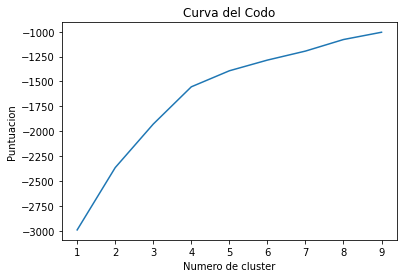

C:\Users\t151540\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


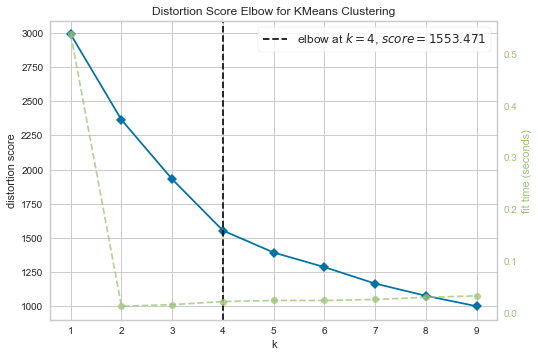

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#Clustering con kmeans

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data_scaled).score(data_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de cluster')
plt.ylabel('Puntuacion')
plt.title('Curva del Codo')
plt.show()
#implementación Yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   




In [15]:
kmeans = KMeans(n_clusters=4).fit(data_scaled)
centroids = kmeans.cluster_centers_
#pintado de centroides
print(centroids)
 

[[-0.36559204 -0.08023097  0.69565173 -0.39999577 -0.87558503  1.15730513
  -0.98206671  0.3913752  -1.19640746 -1.81421125 -1.46705153 -1.65451912
  -0.88944772 -1.64545743  1.78904162 -0.28760088 -0.63253138 -0.63139481
  -0.67800157 -0.73715765 -0.69807959  0.16034274  0.52604796]
 [-0.26543301 -0.86213945 -0.72427008  0.53879119 -0.02427157  0.14939455
  -0.14839125 -0.73913862  0.18205078 -0.06845211 -0.25300805 -0.1441125
   0.59399128 -0.24953376 -0.18198076 -0.34840412  0.20400779 -0.23480943
   0.88802753  0.95457382  1.04563103  0.03559213 -1.04858284]
 [ 1.42195187  1.38047779  0.09676292 -0.72598946  1.71477059 -1.31651923
   1.59248225  0.66412686  1.06890745  0.5151093   0.08813863  0.25917277
   0.18583505  0.83333334 -0.51769725 -0.71130884  1.12864983  1.21166718
   0.49542797  0.41706195  0.07379639  0.4184006   0.8301821 ]
 [-0.27440426  0.12782931  0.25081915  0.07000059 -0.3802439  -0.05376243
  -0.162902    0.1379239  -0.09732676  0.6808332   0.87948708  0.7926547

In [16]:
labels = kmeans.predict(data_scaled)
C = kmeans.cluster_centers_

#creación del dataset con la columna clusterizada
df = pd.DataFrame(labels, columns = ['Cluster'])
total_knn = pd.concat([data, df],axis=1)


In [17]:
#Cargamos la capa Geojson de barrios
barrios_gdf = gpd.read_file("capa_barrios_final.geojson")
barrios_gdf['Nombre_Barrio'] = barrios_gdf['Nombre_Barrio'].str.upper()
list(barrios_gdf)

['OBJECTID',
 'Nombre_Distrito',
 'Codigo_Barrio',
 'Codigo_Distrito',
 'Nombre_Barrio',
 'GlobalID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

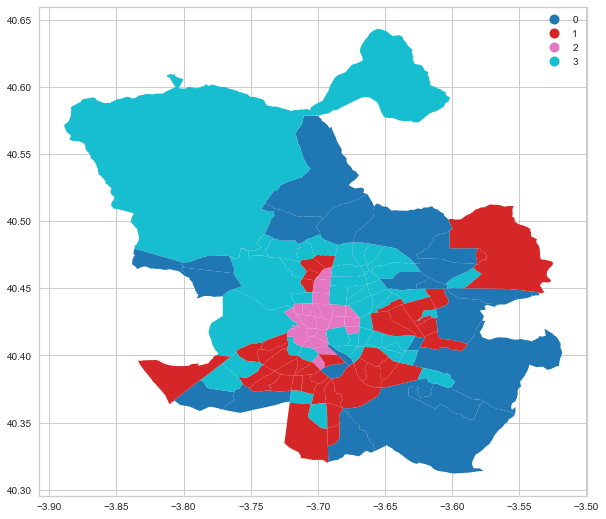

In [18]:
#Insertamos la clasterización por KNN y pintamos
merged_gdf = barrios_gdf.merge(total_knn, on=['Nombre_Barrio'], how='inner')
#merged_gdf.plot()
merged_gdf.plot(column='Cluster', figsize=(12, 9),categorical=True, legend=True);


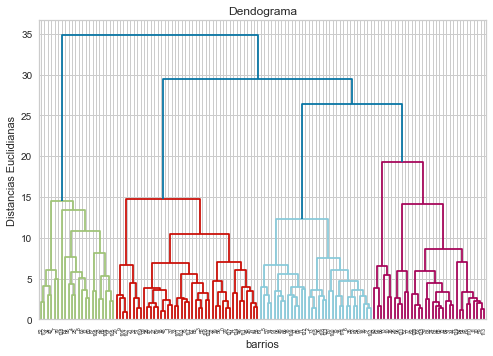

In [19]:
#Clusterización Aglomerativa
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
#dendrogram = sch.dendrogram(sch.linkage(data.drop(columns=['Nombre_Barrio']), method = 'ward'))


plt.title('Dendograma')
plt.xlabel('barrios')
plt.ylabel('Distancias Euclidianas')
plt.rcParams['figure.figsize'] = [12, 40]
plt.show()

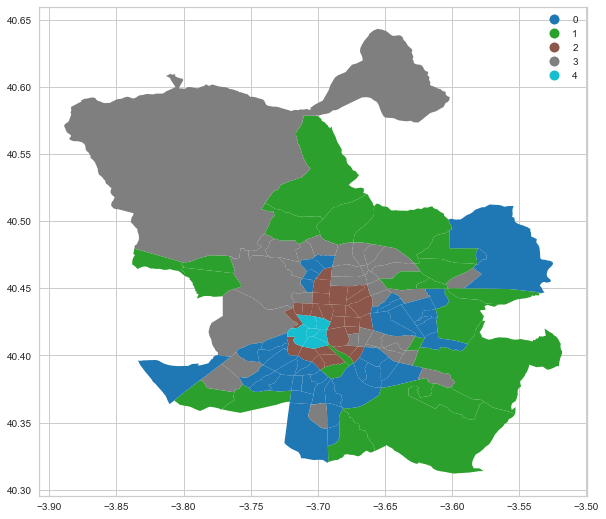

In [22]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(data_scaled)

df_jerarquico = pd.DataFrame(y_hc, columns = ['Cluster_Jerar'])
total_jerar = pd.concat([total_knn, df_jerarquico],axis=1)

merged_gdf = barrios_gdf.merge(total_jerar, on=['Nombre_Barrio'], how='inner')
#merged_gdf.plot()
merged_gdf.plot(column='Cluster_Jerar', figsize=(12, 9),categorical=True, legend=True);

In [23]:
pd.set_option('display.max_rows', 1000)
print(display(total_jerar.groupby('Cluster_Jerar').describe().transpose()))


Cluster_Jerar                                   0              1  \
RATIO_AIRBNB_HECTAREA        count      42.000000      22.000000   
                             mean        0.314286       0.052727   
                             std         0.311410       0.075478   
                             min         0.010000       0.010000   
                             25%         0.070000       0.010000   
                             50%         0.200000       0.025000   
                             75%         0.457500       0.040000   
                             max         1.350000       0.250000   
PRECIO_M2                    count      42.000000      22.000000   
                             mean     1978.523810    2957.681818   
                             std       481.749162     835.290676   
                             min      1043.000000    1643.000000   
                             25%      1645.750000    2177.500000   
                             50%      1833.000000    3083.500000   
                             75%      2276.000000    3577.750000   
                             max      3291.000000    4403.000000   
SUPERFCIE_M2                 count      42.000000      22.000000   
                             mean       69.778571     106.577273   
                             std         8.879177      37.092098   
                             min        53.030000      60.660000   
                             25%        64.960000      78.395000   
                             50%        67.840000      95.260000   
                             75%        73.107500     120.605000   
                             max       100.550000     182.480000   
RATIO_PUERTA                 count      42.000000      22.000000   
                             mean        0.849190       0.696773   
                             std         0.126702       0.219254   
                             min         0.320000       0.210000   
                             25%         0.854500       0.630750   
                             50%         0.883500       0.743500   
                             75%         0.911000       0.833500   
                             max         1.000000       0.991000   
RATIO_LOCAL_HECTAREA         count      42.000000      22.000000   
                             mean       10.719286       1.687273   
                             std         7.294113       1.756184   
                             min         0.230000       0.170000   
                             25%         4.495000       0.622500   
                             50%         9.315000       0.995000   
                             75%        14.865000       1.730000   
                             max        27.050000       7.400000   
TAM_HOGAR_MEDIO              count      42.000000      22.000000   
                             mean        2.586429       2.863182   
                             std         0.161454       0.284143   
                             min         2.290000       2.440000   
                             25%         2.447500       2.642500   
                             50%         2.595000       2.835000   
                             75%         2.670000       3.070000   
                             max         3.030000       3.480000   
RATIO_HOGARES_1PER           count      42.000000      22.000000   
                             mean        0.292857       0.232500   
                             std         0.040976       0.050317   
                             min         0.220000       0.166000   
                             25%         0.260250       0.198750   
                             50%         0.285000       0.210500   
                             75%         0.323750       0.265750   
                             max         0.369000       0.327000   
HIPOT_MEDIA                  count      42.000000      22.000000   
                             mean   103744.654286  24503

None
